# Project 2: What kind of wine is this?
## SGD route 4/4

In [1]:
import numpy as np
import pandas as pd
from cytoolz import *
from tqdm.auto import tqdm

tqdm.pandas()

---

## Load data

In [2]:
train = pd.read_parquet("s3://ling583/wine-train.parquet", storage_options={"anon": True})
test = pd.read_parquet("s3://ling583/wine-test.parquet", storage_options={"anon": True})

In [3]:
import cloudpickle
from sklearn.metrics import classification_report, f1_score, plot_confusion_matrix

In [4]:
sgd = cloudpickle.load(open("sgd.model", "rb"))

In [5]:
predicted = sgd.predict(test[""])
print(classification_report(test["wine_variant"], predicted))

              precision    recall  f1-score   support

        GJOB       0.97      0.94      0.96       573
        GPOL       0.94      0.96      0.95      1853
        GSPO       1.00      0.99      1.00      1410
        GVIO       0.92      0.91      0.92       928

    accuracy                           0.96      4764
   macro avg       0.96      0.95      0.96      4764
weighted avg       0.96      0.96      0.96      4764



---

## LIME
Local Interpretable Model-agnostic Explanations

In [6]:
from lime.lime_review_text import LimeTextExplainer
import matplotlib.pyplot as plt

In [7]:
explainer = LimeTextExplainer(class_names=sgd.named_steps['sgdclassifier'].classes_)

In [8]:
test["wine_variant"].iloc[1613], test[""].iloc[1613]

('GPOL',
 'Top N.Korean officers climb hierarchy - Seoul. A North Korean marshal and two vice-marshals have been listed in the top seven of the Stalinist country\'s ruling hierarchy in a political shift towards the military, analysts said on Monday. "It is unprecedented that three military figures have been listed in such high positions," said Park Sung-hoon, a director general at the Unification Ministry in Seoul. Park said the three officers were listed among the seven top leaders when Pyongyang released its hierarchy during a military parade on Friday. The parade marked the 65th anniversary of the army. "(North Korean leader) Kim Jong-il depends almost solely on the military to maintain the country\'s system," Park said. Marshal Ri Ul-sol and vice marshals Jo Myong-rok and Kim Yong-chun were ranked only behind Kim Jong-il, supreme commander of the country\'s 1.1 million-strong military, and three vice presidents. Kim Jong-il has yet to be formally confirmed as state president and ge

In [9]:
exp = explainer.explain_instance(
    test[""].loc[1613], sgd.decision_function, num_features=15, labels=[0, 1, 2, 3]
)

[]

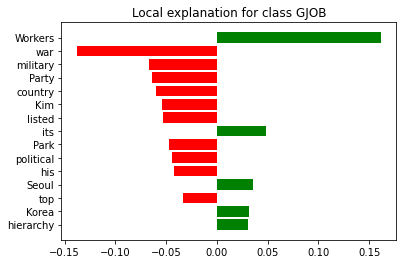

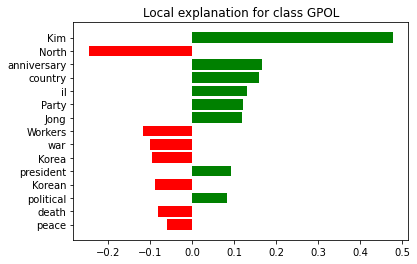

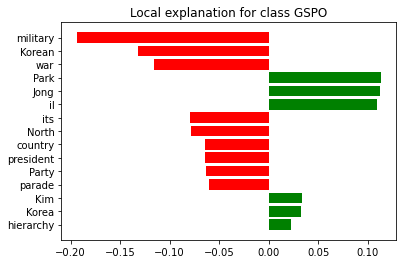

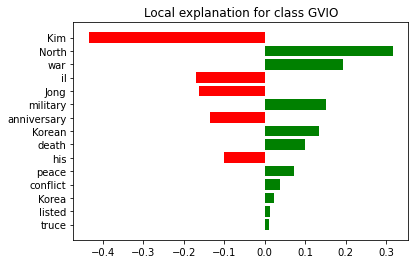

In [10]:
for i in range(0, 4):
    exp.as_pyplot_figure(i)
plt.plot()

In [11]:
err = test[(test['wine_variant']=='GVIO')&(predicted=='GPOL')]

In [12]:
err.iloc[30]

text      G7 leaders say Congo aid depends on reforms. T...
topics                                                 GVIO
Name: 1358, dtype: object

In [13]:
err.iloc[30]['text']

'G7 leaders say Congo aid depends on reforms. The world\'s leading industrial democracies told the new Democratic Republic of the Congo on Saturday that its eligibility for aid would depend on its commitment to democratic reform and respect for human rights. A report by foreign ministers of the Group of Seven nations and Russia said it was important to assist the new authorities who took over the vast African country last month and looked forward to close cooperation with other potential donors. It said the changes in the country, formerly named Zaire, highlighted the "importance of peaceful democratic transition and the establishment of a broadly-based interim administration." The report said: "We believe it is important to assist the new authorities in the transition to an elected government, promote respect for human rights, address urgent humanitarian needs and facilitate economic renewal." But it added: "The willingness of our governments to assist in the rebuilding of national in

[]

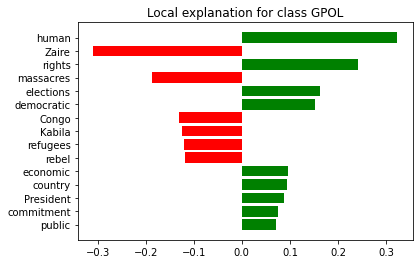

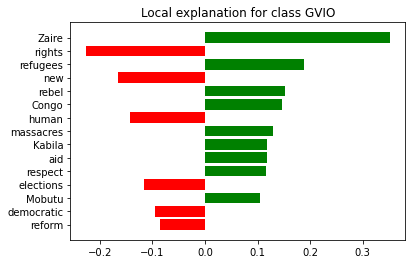

In [14]:
exp = explainer.explain_instance(
    err[""].iloc[30], sgd.decision_function, num_features=15, labels=[1, 3]
)
for i in [1, 3]:
    exp.as_pyplot_figure(i)
plt.plot()

In [15]:
err.iloc[50]

text      Guerrillas oppose Burma application for ASEAN....
topics                                                 GVIO
Name: 2751, dtype: object

In [16]:
err.iloc[50]['']

'Guerrillas oppose Burma application for ASEAN. The leader of Burma\'s main ethnic guerrillas, the Karen National Union (KNU), on Tuesday urged ASEAN nations not to accept the country as a member of the regional grouping. General Bo Mya said the Association of Southeast Asian Nations (ASEAN) should not accept Burma as a member because he said it was still run by a "military dictatorship". "The KNU is strongly opposed to the SLORC\'s plan to apply for membership of ASEAN and we are appealing to ASEAN nations not to accept a country that is still run by a military dictatorship to be one of its members," the 67-year old KNU leader told reporters at this jungle base in southeastern Burma near the Thai border. He was referring to Burma\'s ruling military body, the State Law and Order Restoration Council (SLORC). Malaysia\'s foreign minister Abdullah Badawi said earlier Burma made a formal application for full membership of ASEAN. The Malaysian national news agency Bernama quoted Abdullah as

[]

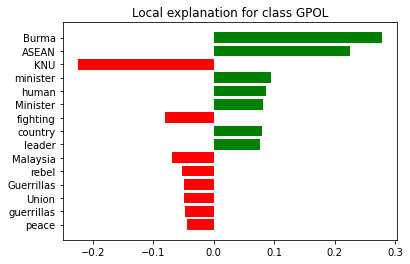

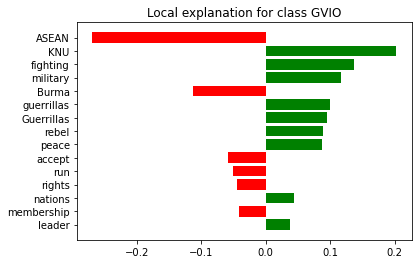

In [17]:
exp = explainer.explain_instance(
    err[""].iloc[50], sgd.decision_function, num_features=15, labels=[1, 3]
)
for i in [1, 3]:
    exp.as_pyplot_figure(i)
plt.plot()

In [18]:
import kwic

In [19]:
kwic.kwic('upper', train[''])

9,"to holiday trips and cars rather than on having children, Dobritz said. In",upper,"-income groups, many women choose not to have children because they do not"
26,"the Sejm, needed to muster 50 percent plus one of the votes to reject the",upper,"house veto. The Church, drawing on the authority of Polish-born Pope John"
52,"t did not project how many seats each party would win. The Senate, the new",upper,"chamber of Czech parliament which will have limited legislative powers, is"
182,"approve the mission, by 162 votes to 81 with one abstention in the Senate (",upper,house). Prodi was never in danger since he commands an absolute majority i
196,s. The rupiah quickly recovered from Thursday's weakness to trade near the,upper,limit of the central bank's intervention band against the dollar. At 0842
268,the SPD can block most tax measures through its majority in the Bundesrat,upper,"house. Kohl warned SPD leaders, who pulled out of tax talks with the gover"
400,n two years without elections. His draft constitution would also create an,upper,"house of parliament partly appointed by himself, and give him the right to"
448,"t, is about 70 km (45 miles) south of Lubutu, which guards the road to the",Upper,"Zaire provincial capital of Kisangani, headquarters for a counter-offensiv"
489,"nists, had left for the Christmas holidays. The government had the Senate (",upper,"house) reject the harshest amendments, but the bill's return to the lower"
544,"vote against, an offifial said. The bill now advances to the floor of the",upper,house. The legislation is considered important for upcoming privatizatio


**TO DO:** Write a brief general summary of the results of this analysis (along with the previous ones). Do we have a good classifier? What would be the next steps for improving it?

For the most part, the classifier that we have built does a good job. There are a few quirks and issues that I believe stem from the training data and problems with the original classification of the articles. There were a number of articles that our classifier was able to categorize more accurately that the original, which shows as being done wrong but in actuality is not. It is apparent that most of the issues that we see with the classifier are due to inaccuracies in the original data that caused there to be anomolies in the classifier coefficients which threw off the rest of the program. 

Looking at the graphs above, the effects of these anomolies becomes clearer. We see names and places that were relevant to the times that the articles were written in, but would not be applicable or of use in todays articles. There are also issues with certain words like 'newsroom' that is tacked onto the end of each article, whicj would become an issue if we wanted to apply this classifier to a different news sources articles. 

There are two things that I would do to being improving this classifier and they both have to do with the data it uses. The first step would be to provide it with more modern and diverse (from different sources) articles; this could (and hopefully would) serve to dilute the weight of the less applicable words like )'Clinton' and )'Zaire' that made their way in and strengthen those that are actually applicable to their categories. The second step would be to clean out any data at the end of each article that is repeated in all of them, this would be the 'newsroom' line that is at the end of each article. This could help to disambiguate them from each other by way of removing similar phrasing and words. 